**Baublebar Campaign Analysis**

Data Fields:

imps_seen -- retargetable impression

imps_avail -- general volume estimate for domain (usually not filled in, sometimes it is)

num_served -- impressions we have served (ads we have bought)

num_visible -- impressions was have served that were visible (ads we have bought that are visible -- the ad is actually shown on page)

total_spent -- sum(cpm) (the amount of money we spent on a campaign)

total_ecp -- sum(ecp associate with the auction) 

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bauble_df = pd.read_csv('new_hire.csv')
bauble_df.head()

,advertiser,domain,num_seen,num_avail,num_served,num_visible,total_spent,total_ecp,Unnamed: 8
0,baublebar,NaN,898,0,0,0,0.000000,0.0000,NaN
1,baublebar,NaN,0,0,3,0,0.000000,0.0000,NaN
2,baublebar,NaN,6066,504,2154,532,2516.025009,14202.7509,NaN
3,baublebar,$,263,0,0,0,0.000000,0.0000,NaN
4,baublebar,$ad.mangapanda.com,8,0,0,0,0.000000,0.0000,NaN


In [3]:
bauble_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20899 entries, 0 to 20898
Data columns (total 9 columns):
advertiser     20899 non-null object
domain         20896 non-null object
num_seen       20899 non-null object
num_avail      20899 non-null int64
num_served     20899 non-null int64
num_visible    20899 non-null int64
total_spent    20899 non-null float64
total_ecp      20899 non-null float64
Unnamed: 8     5 non-null float64
dtypes: float64(3), int64(3), object(3)
memory usage: 1.4+ MB


In [4]:
bauble_df.describe()

,num_avail,num_served,num_visible,total_spent,total_ecp,Unnamed: 8
count,2.089900e+04,20899.000000,20899.000000,20899.000000,20899.000000,5.000000
mean,2.349637e+03,3.642997,0.870233,3.365043,12.741797,5.610800
std,1.419706e+05,81.844636,15.912702,68.444368,341.175032,10.255931
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.580000
25%,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.860000
50%,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.281000
75%,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.385000
max,1.404101e+07,7000.000000,984.000000,4504.357517,24938.656900,23.948000


Unnamed 8? Looks like only 5 items in this last mysterious column

In [5]:
bauble_df[bauble_df['Unnamed: 8'].notnull()]

,advertiser,domain,num_seen,num_avail,num_served,num_visible,total_spent,total_ecp,Unnamed: 8
8499,baublebar,homes.com\x94,type=,0,0,4,0.0,4.677370,0.580
8501,baublebar,homes.com\xe2\x80\x9d,type=,0,0,9,4.0,8.141027,1.281
9081,baublebar,imleagues.com\xc3\xae,type=,0,0,1,1.0,0.963690,0.860
18855,baublebar,trulia.com\xe2\x80\x9d,type=,0,0,10,3.0,19.319804,23.948
19001,baublebar,twitpic.com\xe2\x80\x9d,type=,0,0,8,8.0,6.435709,1.385


num_seen is equal to 'type=' for all of these.  I'm assuming this is erroneous data and removing it, then removing the last column for cleen-up. I'm also renaming num_seen and num_avail as imp_seen and imp_avail to tell columns apart more easily.

**If this is not bad data let me know!**

In [6]:
bauble_df = bauble_df[bauble_df['num_seen']!='type=']
bauble_df = bauble_df.drop('Unnamed: 8', 1)
bauble_df = bauble_df.rename(columns={'num_seen':'imp_seen', 'num_avail':'imp_avail'})
bauble_df.head()

,advertiser,domain,imp_seen,imp_avail,num_served,num_visible,total_spent,total_ecp
0,baublebar,NaN,898,0,0,0,0.000000,0.0000
1,baublebar,NaN,0,0,3,0,0.000000,0.0000
2,baublebar,NaN,6066,504,2154,532,2516.025009,14202.7509
3,baublebar,$,263,0,0,0,0.000000,0.0000
4,baublebar,$ad.mangapanda.com,8,0,0,0,0.000000,0.0000


In [7]:
bauble_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20894 entries, 0 to 20898
Data columns (total 8 columns):
advertiser     20894 non-null object
domain         20891 non-null object
imp_seen       20894 non-null object
imp_avail      20894 non-null int64
num_served     20894 non-null int64
num_visible    20894 non-null int64
total_spent    20894 non-null float64
total_ecp      20894 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.4+ MB


I'll need to convert imp_seen to numeric values for the analysis

In [8]:
bauble_df['imp_seen'] = pd.to_numeric(bauble_df['imp_seen'])
bauble_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20894 entries, 0 to 20898
Data columns (total 8 columns):
advertiser     20894 non-null object
domain         20891 non-null object
imp_seen       20894 non-null int64
imp_avail      20894 non-null int64
num_served     20894 non-null int64
num_visible    20894 non-null int64
total_spent    20894 non-null float64
total_ecp      20894 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 1.4+ MB


Almost 21,000 domains with data

In [9]:
#desciption of retargetable impressions (imp_seen) data to get an idea of what we're working with 
bauble_df['imp_seen'].describe()

count    2.089400e+04
mean     1.035231e+03
std      2.637544e+04
min      0.000000e+00
25%      1.000000e+01
50%      3.100000e+01
75%      1.330000e+02
max      3.381524e+06
Name: imp_seen, dtype: float64

Some domains don't have any retargetable impressions and then there's one with over 3 million. Huge range, and huge jump from the 75th percentile to the max. The max must be an outlier. We can look at it out of curiosity.

In [10]:
#domain of max retargetable impressions...not very helpful it looks like
bauble_df.ix[bauble_df['imp_seen'].argmax()]

advertiser     baublebar
domain             OTHER
imp_seen         3381524
imp_avail              0
num_served             0
num_visible            0
total_spent            0
total_ecp              0
Name: 418, dtype: object

In [11]:
#description of general volume of impressions, most are not given
bauble_df['imp_avail'].describe()

count    2.089400e+04
mean     2.350199e+03
std      1.419875e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.404101e+07
Name: imp_avail, dtype: float64

In [14]:
bauble_df[bauble_df['imp_avail']>0].count()

advertiser     127
domain         126
imp_seen       127
imp_avail      127
num_served     127
num_visible    127
total_spent    127
total_ecp      127
dtype: int64

So only 127 domains have expected general volume data provided. Let's see what the volume looks like for most sites.

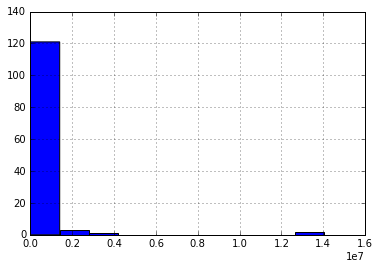

In [15]:
#histogram showing rough distribution of the general expected volume (of domains where it's provided)...looks like most are expecting volume less than 500,000
genVolume = bauble_df[bauble_df['imp_avail']!=0]
genVolume['imp_avail'].hist()

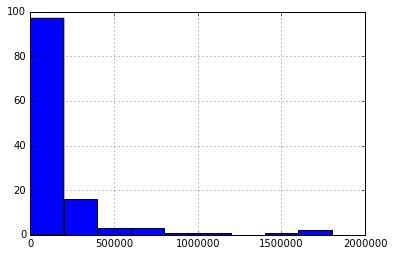

In [17]:
genVolume['imp_avail'].hist(range = [0, 2000000])

Let's look at the domains with the most retargetable impressions, as that's where there is the most opportunity to gain users

In [18]:
#The top 10 domains with the most retargetable impressions
bauble_df.sort_values('imp_seen', ascending=False).head(10)

,advertiser,domain,imp_seen,imp_avail,num_served,num_visible,total_spent,total_ecp
418,baublebar,OTHER,3381524,0,0,0,0.000000,0.0000
1233,baublebar,answers.com,1149669,0,0,0,0.000000,0.0000
185,baublebar,247gamer.net,672724,0,0,0,0.000000,0.0000
1315,baublebar,apps.mobile.adnxs.com,452708,0,813,0,915.782561,2634.9947
5488,baublebar,ebay.com,448904,0,2158,623,3919.839577,24938.6569
8895,baublebar,ib.adnxs.com,379438,0,1685,474,730.171021,567.0333
27,baublebar,-,359043,0,0,0,0.000000,0.0000
3347,baublebar,celebs.answers.com,302254,0,0,0,0.000000,0.0000
7461,baublebar,getdecorating.com,293771,0,41,7,35.318771,30.5640
11781,baublebar,minq.com,207192,14041011,1044,163,948.101024,1232.6049


It looks like some of the domains with the most opportunities for purchasing impressions are not being purchased at all.  Maybe  there's a good reason for this. Let's take a look at the domains where impressions are being purchased.

In [19]:
#The top 10 domains with the most impressions purchased
bauble_df.sort_values('num_served', ascending=False).head(10)

,advertiser,domain,imp_seen,imp_avail,num_served,num_visible,total_spent,total_ecp
18205,baublebar,therichest.com,29424,13994979,7000,106,1410.950885,22321.2407
4566,baublebar,dailyworth.com,2773,335884,4284,704,679.343299,7292.1466
7479,baublebar,getoffmyinternets.net,40396,29,4151,912,4446.322567,21172.1757
4146,baublebar,cosmopolitan.com,12199,1170976,4128,393,3676.782240,9253.9891
2154,baublebar,betcheslovethis.com,6565,3,3064,984,4504.357517,15198.5580
5488,baublebar,ebay.com,448904,0,2158,623,3919.839577,24938.6569
2,baublebar,NaN,6066,504,2154,532,2516.025009,14202.7509
8895,baublebar,ib.adnxs.com,379438,0,1685,474,730.171021,567.0333
13824,baublebar,perezhilton.com,81477,0,1664,840,1656.581450,10577.9060
6237,baublebar,fashionfindblog.com,94812,0,1346,445,1135.104831,1779.8149


**Interesting!**  This makes sense.  Baublebar is clearly a site that caters to women interested in jewelry/fashion/luxury accesories. It makes sense to buy ads on sites that target a similar market.  therichest appeals to fancy living, and betcheslovethis (lol the internet never fails to amaze) appeals to younger women. Then there's ebay that appeals to everyone who shops, so you capture the market of men who are buying gifts for significant others/daughters. 

**First Question that comes to mind:**

What does it mean that only some ads that are purchased are visible on the page (num_visible)? Why buy an ad if it's not visible? 

I'm not sure how to use this data of visible ads vs. not visible ads

Let's add a column for win-rates (num_served/imp_seen)

In [20]:
bauble_df['win_rate'] = 100*(bauble_df['num_served']/bauble_df['imp_seen'])

In [21]:
bauble_df.sort_values('num_served', ascending=False).head(10)

,advertiser,domain,imp_seen,imp_avail,num_served,num_visible,total_spent,total_ecp,win_rate
18205,baublebar,therichest.com,29424,13994979,7000,106,1410.950885,22321.2407,23.790103
4566,baublebar,dailyworth.com,2773,335884,4284,704,679.343299,7292.1466,154.489722
7479,baublebar,getoffmyinternets.net,40396,29,4151,912,4446.322567,21172.1757,10.275770
4146,baublebar,cosmopolitan.com,12199,1170976,4128,393,3676.782240,9253.9891,33.838839
2154,baublebar,betcheslovethis.com,6565,3,3064,984,4504.357517,15198.5580,46.671744
5488,baublebar,ebay.com,448904,0,2158,623,3919.839577,24938.6569,0.480726
2,baublebar,NaN,6066,504,2154,532,2516.025009,14202.7509,35.509397
8895,baublebar,ib.adnxs.com,379438,0,1685,474,730.171021,567.0333,0.444078
13824,baublebar,perezhilton.com,81477,0,1664,840,1656.581450,10577.9060,2.042294
6237,baublebar,fashionfindblog.com,94812,0,1346,445,1135.104831,1779.8149,1.419652


Your email explains that some domains will have win rates over 100%, like in the case of dailyworth.com, which you said is a whitelisted domain. For these, you divide by the general volume you expect to see on that site (imp_avail) instead. 

**Second Question: **

Should I assume that any domain with the general volume (imp_avail) provided is a whitelisted domain? If so, I'll alter the win rate so that  it these into consideration.

In [22]:
#assuming imp_avail means the domain is whitelisted, divide by imp_avail instead
bauble_df.loc[bauble_df['imp_avail'] > 0, 'win_rate'] = 100*(bauble_df['num_served']/bauble_df['imp_avail'])

In [23]:
bauble_df.sort_values('num_served', ascending=False).head(10)

,advertiser,domain,imp_seen,imp_avail,num_served,num_visible,total_spent,total_ecp,win_rate
18205,baublebar,therichest.com,29424,13994979,7000,106,1410.950885,22321.2407,0.050018
4566,baublebar,dailyworth.com,2773,335884,4284,704,679.343299,7292.1466,1.275440
7479,baublebar,getoffmyinternets.net,40396,29,4151,912,4446.322567,21172.1757,14313.793103
4146,baublebar,cosmopolitan.com,12199,1170976,4128,393,3676.782240,9253.9891,0.352526
2154,baublebar,betcheslovethis.com,6565,3,3064,984,4504.357517,15198.5580,102133.333333
5488,baublebar,ebay.com,448904,0,2158,623,3919.839577,24938.6569,0.480726
2,baublebar,NaN,6066,504,2154,532,2516.025009,14202.7509,427.380952
8895,baublebar,ib.adnxs.com,379438,0,1685,474,730.171021,567.0333,0.444078
13824,baublebar,perezhilton.com,81477,0,1664,840,1656.581450,10577.9060,2.042294
6237,baublebar,fashionfindblog.com,94812,0,1346,445,1135.104831,1779.8149,1.419652


I guess that's not a good assumption to make or else you get win rates like getoffmyinternets or betcheslovethis.  I'll change it back for now.

**Third Question: **

If a domain like getoffmyinternets or betcheslovethis has such a small expeected volume of impressions available (29,3) compared to others, why is it worth buying ads there? 

In [24]:
bauble_df['win_rate'] = 100*(bauble_df['num_served']/bauble_df['imp_seen'])
bauble_df.sort_values('num_served', ascending=False).head(10)

,advertiser,domain,imp_seen,imp_avail,num_served,num_visible,total_spent,total_ecp,win_rate
18205,baublebar,therichest.com,29424,13994979,7000,106,1410.950885,22321.2407,23.790103
4566,baublebar,dailyworth.com,2773,335884,4284,704,679.343299,7292.1466,154.489722
7479,baublebar,getoffmyinternets.net,40396,29,4151,912,4446.322567,21172.1757,10.275770
4146,baublebar,cosmopolitan.com,12199,1170976,4128,393,3676.782240,9253.9891,33.838839
2154,baublebar,betcheslovethis.com,6565,3,3064,984,4504.357517,15198.5580,46.671744
5488,baublebar,ebay.com,448904,0,2158,623,3919.839577,24938.6569,0.480726
2,baublebar,NaN,6066,504,2154,532,2516.025009,14202.7509,35.509397
8895,baublebar,ib.adnxs.com,379438,0,1685,474,730.171021,567.0333,0.444078
13824,baublebar,perezhilton.com,81477,0,1664,840,1656.581450,10577.9060,2.042294
6237,baublebar,fashionfindblog.com,94812,0,1346,445,1135.104831,1779.8149,1.419652


In [25]:
#domains with the highest win rates
bauble_df.sort_values('win_rate', ascending=False).head(10)

,advertiser,domain,imp_seen,imp_avail,num_served,num_visible,total_spent,total_ecp,win_rate
19914,baublebar,websearch.wonderfulsearches.info,0,0,1,1,2.887680,1.470,inf
12983,baublebar,north-craft.com,0,0,4,0,2.935642,1.289,inf
2778,baublebar,brightsideof.com,0,0,1,0,0.555128,1.820,inf
12971,baublebar,nominimalisthere.blogspot.com,0,0,4,2,4.103288,1.133,inf
19940,baublebar,weddingthingz.com,0,0,1,1,2.241401,6.010,inf
1119,baublebar,amusingearth.org,0,0,3,3,2.124081,18.218,inf
11941,baublebar,molempire.com,0,0,2,0,1.835449,2.120,inf
4756,baublebar,decoratedlife.com,0,0,1,0,2.671993,0.281,inf
4760,baublebar,decorchick.com,0,0,6,0,6.274225,26.552,inf
16045,baublebar,sheikh-search.com,0,0,2,2,1.391046,1.025,inf


**Fourth Question:**

Looks like some ads are being purchased even if there are no retargetable impressions seen (imp_seen), resulting in infinity (divide by zero) win rates. Is there a reason for this?

In [26]:
#domains with the highest win rates, excluding infinity results
bauble_df[bauble_df['win_rate']<float('inf')].sort_values('win_rate', ascending=False).head(10)

,advertiser,domain,imp_seen,imp_avail,num_served,num_visible,total_spent,total_ecp,win_rate
13430,baublebar,openx.com,14,0,78,5,90.889742,232.8200,557.142857
17834,baublebar,thecollegeprepster.com,229,0,797,140,2015.675998,6778.1082,348.034934
10036,baublebar,kontextua.com,7,0,13,1,5.520498,76.7540,185.714286
4566,baublebar,dailyworth.com,2773,335884,4284,704,679.343299,7292.1466,154.489722
16309,baublebar,skinnyvscurvy.com,525,14968,663,212,930.167103,4048.4627,126.285714
18999,baublebar,twitpic.com,10,0,12,9,12.842595,6.7770,120.000000
7799,baublebar,gpva.org,6,0,6,0,2.182190,1.3020,100.000000
2211,baublebar,bigbigforums.com,6,0,6,0,5.300569,5.4240,100.000000
17544,baublebar,technewsph.com,8,0,7,0,8.131694,11.6360,87.500000
6176,baublebar,fannetasticfood.com,145,13638,123,25,228.112614,1046.4050,84.827586


**Fifth Question:**

With ECP (Estimated Clear Price) being the price that is expected to win most bids, how should I interpret total_ecp? Is this the total ECP if you add the ECP for every impression purchased (num_served)? Meaning if I divided total_ecp by num_served, I'd get the average ECP for each ad purchased?  

I'll move on assuming this is true, and use similar logic for total_spent

In [27]:
bauble_df['ecp_per_serve'] = bauble_df['total_ecp'] / bauble_df['num_served']
bauble_df['spent_per_serve'] = bauble_df['total_spent'] / bauble_df['num_served']
bauble_df.sort_values('num_served', ascending=False).head(10)

,advertiser,domain,imp_seen,imp_avail,num_served,num_visible,total_spent,total_ecp,win_rate,ecp_per_serve,spent_per_serve
18205,baublebar,therichest.com,29424,13994979,7000,106,1410.950885,22321.2407,23.790103,3.188749,0.201564
4566,baublebar,dailyworth.com,2773,335884,4284,704,679.343299,7292.1466,154.489722,1.702182,0.158577
7479,baublebar,getoffmyinternets.net,40396,29,4151,912,4446.322567,21172.1757,10.275770,5.100500,1.071145
4146,baublebar,cosmopolitan.com,12199,1170976,4128,393,3676.782240,9253.9891,33.838839,2.241761,0.890693
2154,baublebar,betcheslovethis.com,6565,3,3064,984,4504.357517,15198.5580,46.671744,4.960365,1.470091
5488,baublebar,ebay.com,448904,0,2158,623,3919.839577,24938.6569,0.480726,11.556375,1.816422
2,baublebar,NaN,6066,504,2154,532,2516.025009,14202.7509,35.509397,6.593663,1.168071
8895,baublebar,ib.adnxs.com,379438,0,1685,474,730.171021,567.0333,0.444078,0.336518,0.433336
13824,baublebar,perezhilton.com,81477,0,1664,840,1656.581450,10577.9060,2.042294,6.356915,0.995542
6237,baublebar,fashionfindblog.com,94812,0,1346,445,1135.104831,1779.8149,1.419652,1.322299,0.843317


It looks like, using the assumption I made above, that for a lot of these domains you are spending less than the ECP.  Let's see if this is true throughout all of the domains.

In [28]:
print 'Avg ECP per ad impression: ', bauble_df['ecp_per_serve'].mean()
print 'Avg Spent per ad impression: ', bauble_df['spent_per_serve'].mean()

Avg ECP per ad impression:  3.34066648425
Avg Spent per ad impression:  1.16820793893


This shows for every impression purchased in this campaign, you're spending about $2.18 less than the ECP. Efficient spending! Of course I made a lot of assumptions...so this could not be the true story.

Let's see a visualization of this anyways

In [29]:
cost_df = DataFrame({'ECP per Ad': bauble_df['ecp_per_serve'], 'Price Paid': bauble_df['spent_per_serve']})
sorted_cost = cost_df.sort_values('ECP per Ad', na_position = 'first')

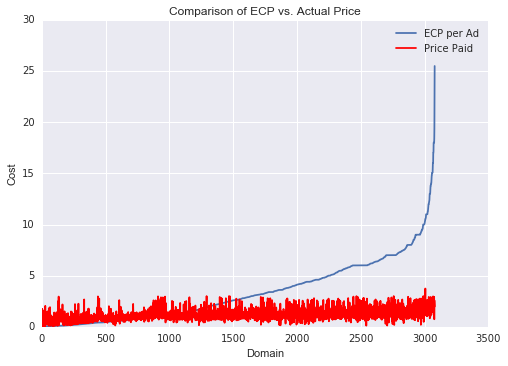

In [30]:
import seaborn as sns
sorted_cost = cost_df.sort_values('ECP per Ad')
sorted_cost.index = range(len(sorted_cost))
sns.set_style("darkgrid")
plt.plot(sorted_cost['ECP per Ad'], label='ECP per Ad')
plt.plot(sorted_cost['Price Paid'], color='r', label='Price Paid')
plt.xlabel('Domain')
plt.ylabel('Cost')
plt.title('Comparison of ECP vs. Actual Price')
plt.legend()
plt.show()

We can see in this visual that the actual amount paid per impression consistently stayed under $5.00 regardless if the ECP was very low, or if the ECP was very high.  

**Conclusions and Thoughts So Far**

1. For this Baublebar campaign, it looks like the impressions that are being purchased are targeting the right market. It makes sense to target people interested in shopping/fashion/luxury, and the domains that the campaign targets the most fit somewhere in that market.

2. There are still a lot of domains that seem to have a lot of retargetable impressions but are not being bid on at all. Maybe the campaign would reach even more potential customers if they allocated some resources to these domains.

3. It looks like the campaign is winning auctions efficiently by spending less than the ECP. This also is based off a lot of assumptions that I made so this could not be entirely true. 

4. This data does not give any insight into how many impressions result in conversions (purchases). It would be interesting for calculating the CPA (Cost per Action). This information would also be useful for comparing campaign strategies. We could use this data with CPA provided, and then try a different bidding strategy (bid closer to ECP to win more impressions or target more high volume domains) and then compare the results.
 